# Business Problem

Your company is expanding in to new industries to diversify its portfolio. 

Specifically, they are interested in **purchasing and operating airplanes** for **commercial and private enterprises**, but do not know anything about the potential risks of aircraft. 

You are charged with determining which aircraft are the **lowest risk** for the company to start this new business endeavor. 

You must then translate your findings into actionable insights that the head of the new aviation division can use to **help decide which aircraft to purchase**.

## How Do We Define Risk

- Initial thoughts on risk is we sum the injury columns and divide by the total uninjured column. We should also weigh these values by the amount of people on board (sum of injured/uninjured). 

- Curious if 'Amateur.Built' flights are more dangerous.

- Are all injuries weighted the same? 
    - I would like my plane rides to be injury free but what consititues a minor/major injury? 
    - Stubbed toe as a minor injury isn't related to the quality of the plane. 
    
    
Business Owner - US Based - Domestic Flights 

- Flight Training Program based in the US, only domestic flights 
- Compare Planes v Helicopters v Weight-Shifters 

# Exploratory Data Analysis

In [1]:
# Import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
# Import csv
df = pd.read_csv('data_files/AviationData.csv', encoding='latin')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(88889, 31)

In [4]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Data Types and Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Changing the naming convention of columns
df.columns = df.columns.str.lower().str.replace('.', '_')
df.columns

<ipython-input-6-9c64ad7ad4fe>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace('.', '_')


Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [7]:
# Check for duplicates inside of the csv
df_no_duplicates = df.drop_duplicates()

df.shape

(88889, 31)

In [8]:
# Percent of missing values in each column
df.isna().sum() * 100 / len(df)

event_id                   0.000000
investigation_type         0.000000
accident_number            0.000000
event_date                 0.000000
location                   0.058500
country                    0.254250
latitude                  61.320298
longitude                 61.330423
airport_code              43.469946
airport_name              40.611324
injury_severity            1.124999
aircraft_damage            3.593246
aircraft_category         63.677170
registration_number        1.481623
make                       0.070875
model                      0.103500
amateur_built              0.114750
number_of_engines          6.844491
engine_type                7.961615
far_description           63.974170
schedule                  85.845268
purpose_of_flight          6.965991
air_carrier               81.271023
total_fatal_injuries      12.826109
total_serious_injuries    14.073732
total_minor_injuries      13.424608
total_uninjured            6.650992
weather_condition          5

## Descriptive Statistics

In [9]:
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Analysis of Statistics
- There are large outlier inside of all of the injury metrics. However, these outliers are important and give us valuable information about the riskiness of the aircraft. 

- We should not remove these outliers. 

In [10]:
df.mode().T

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
event_id,20001212X19172,20001214X45071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investigation_type,Accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident_number,CEN22FA424,CEN22LA149,CEN22LA346,CEN23MA034,DCA22LA135,DCA22LA201,DCA22WA089,DCA22WA130,DCA22WA158,DCA22WA167,...,ERA22LA103,ERA22LA119,ERA22LA364,ERA22LA379,GAA22WA241,WPR22FA309,WPR22LA143,WPR22LA201,WPR23LA041,WPR23LA045
event_date,1982-05-16,1984-06-30,2000-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,"ANCHORAGE, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,332739N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0112457W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airport_code,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airport_name,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration and Cleaning

In [11]:
def column_info(dataframe, column):
    """
    Provides a view into the row information provided in each column
    -
    Input:
    dataframe : Pandas DataFrame
    columns_list: list 
    -
    Output:
        Prints:
            - A preview of the first 5 values in the column.
            - Value counts of the column.
            - The percentage of missing values in the column.
    """
    preview = dataframe[column].head()
    value_counts = dataframe[column].value_counts()
    percent_missing = dataframe[column].isna().sum() * 100 / len(dataframe)
    
    print("Preview of the first 5 rows in the column:")
    print(preview)
    print("\nValue counts of the column:")
    print(value_counts)
    print("\nPercentage of missing values in the column:")
    print(f"{percent_missing:.2f}%") 

### event_id

In [12]:
# Preview the row entries for the column
column_info(df,'event_id')

Preview of the first 5 rows in the column:
0    20001218X45444
1    20001218X45447
2    20061025X01555
3    20001218X45448
4    20041105X01764
Name: event_id, dtype: object

Value counts of the column:
20001214X45071    3
20001212X19172    3
20001212X16626    2
20001205X00276    2
20001206X01403    2
                 ..
20090805X02032    1
20001212X24159    1
20070208X00157    1
20200810X10144    1
20030729X01213    1
Name: event_id, Length: 87951, dtype: int64

Percentage of missing values in the column:
0.00%


**Review**

The event_id serves as a unqiue indentifier for each row entry. These are for reference to search the event on the NTSB aviation accident database. 

**Recommendation**

They are not needed to determine the business problem. 

**Action**

In [13]:
# Drop column
df.drop(columns=['event_id'], inplace=True)

### investigation_type

In [14]:
# Preview the row entries for the column
column_info(df,'investigation_type')

Preview of the first 5 rows in the column:
0    Accident
1    Accident
2    Accident
3    Accident
4    Accident
Name: investigation_type, dtype: object

Value counts of the column:
Accident    85015
Incident     3874
Name: investigation_type, dtype: int64

Percentage of missing values in the column:
0.00%


**Review**

Events are classified as either being accidents or incidents. 

According to the Code of Federal Regulations, "an accident is defined as an occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight and all such persons have disembarked, and in which any person suffers death or serious injury, or in which the aircraft receives substantial damage. For purposes of this part, the definition of “aircraft accident” includes “unmanned aircraft accident,” as defined herein."

An incident is defined as "an occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations."

https://www.ecfr.gov/current/title-49/subtitle-B/chapter-VIII/part-830/subpart-A/section-830.2

**Recommendation**

Narrow our search to only include records that are labeled as accident. 
- This would result in about 5% of the total data being dropped.

**Action**

In [15]:
# Filter the event_id column for only accidents
df = df[df['investigation_type'] != 'incident']

# Transform the entries in the column to lowercase
df['investigation_type'] = df['investigation_type'].str.lower()

### accident_number

In [16]:
# Preview the row entries for the column
column_info(df,'accident_number')

Preview of the first 5 rows in the column:
0    SEA87LA080
1    LAX94LA336
2    NYC07LA005
3    LAX96LA321
4    CHI79FA064
Name: accident_number, dtype: object

Value counts of the column:
CEN23MA034    2
ERA22FA338    2
WPR23LA041    2
ERA22FA318    2
DCA22WA167    2
             ..
ATL84LA290    1
CHI97LA165    1
NYC92LA085    1
DEN07CA047    1
CEN11CA501    1
Name: accident_number, Length: 88863, dtype: int64

Percentage of missing values in the column:
0.00%


**Review**

Similar to event_id, the accident_number serves as a unqiue indentifier for each row entry. These are for reference to search the accident on the NTSB aviation accident database. 

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal. 

**Action**

In [17]:
# Drop column
df.drop(columns=['accident_number'], inplace=True)

### event_date

In [18]:
# Preview the row entries for the column
column_info(df,'event_date')

Preview of the first 5 rows in the column:
0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
Name: event_date, dtype: object

Value counts of the column:
1982-05-16    25
2000-07-08    25
1984-06-30    25
1984-08-25    24
1983-08-05    24
              ..
2007-09-24     1
2021-11-16     1
2019-02-19     1
1997-02-28     1
1986-03-27     1
Name: event_date, Length: 14782, dtype: int64

Percentage of missing values in the column:
0.00%


**Review**

There is an event_date for every row. However, the date is currently cast as an object (string). 

**Recommendation** 

Cast the column as datetime64. 

**Action**

In [19]:
# Transforming the Dtype of the column from object to datetime
df['event_date'] = pd.to_datetime(df['event_date'])

### location and country

In [20]:
# Preview the row entries for the column
column_info(df,'location')

Preview of the first 5 rows in the column:
0    MOOSE CREEK, ID
1     BRIDGEPORT, CA
2      Saltville, VA
3         EUREKA, CA
4         Canton, OH
Name: location, dtype: object

Value counts of the column:
ANCHORAGE, AK        434
MIAMI, FL            200
ALBUQUERQUE, NM      196
HOUSTON, TX          193
CHICAGO, IL          184
                    ... 
BROWNSMEAD, OR         1
WALLACE, CA            1
FREEMASON IS., LA      1
Carnation, WA          1
AREQUIPA, PERU         1
Name: location, Length: 27758, dtype: int64

Percentage of missing values in the column:
0.06%


In [21]:
# Check for missing values
df['location'].isna().sum()

52

In [22]:
# Row entry review

# Copy the DataFrame so no data is lost
df_copy = df.copy()

# Fill NaN values with a blank string
df_copy['location'].fillna('', inplace=True)

# Apply the filter
df_copy[df_copy['location'].str.contains('NEAR')]['location']

33        NEAR LAS VEGAS, NV
50       NEAR BAKERSFIEL, CA
75          NEAR BOZEMAN, MT
95          NEAR NUIQSUT, AK
127         NEAR LANSING, MI
                ...         
24104     NEAR TALKEETNA, AK
24268      NEAR COLD BAY, AK
28190       NEAR ILIAMNA, AK
33498      NEAR SKWENTNA, AK
48186      NEAR MUSKEGON, MI
Name: location, Length: 167, dtype: object

In [23]:
# Show if there is a country listed for location values that are NaNs
df['location'][df['country'] != 'United States'].value_counts()

ATLANTIC OCEAN            81
SAN JUAN                  53
London, United Kingdom    48
PACIFIC OCEAN             45
GULF OF MEXICO            30
                          ..
Sinop, Brazil              1
SOLO CITY, INDONESIA       1
Oberbarnim, Germany        1
Salta, Argentina           1
AREQUIPA, PERU             1
Name: location, Length: 4731, dtype: int64

**Review**

The location column while providing more detail than the country file has some issues. 

First is that not every entry has an accurate city location. 

Second is that for foreign countries, there are multiple comma delimters indentifying the city. Additionally, the country is listed inside of the location.

**Examples**:

- Los Mochis, Sinaloa, Mexico
- Ledbury, Herefordshire, United Kingdom
- Panama City, Panama
- Ji'an City Jiangxi Province, China

**Recommendation** 
- Use only the state identifier in the location column and drop the 52 rows that do not have a state identifier. 
    - Use only the rows that are located inside of the United States. 
        - Doing so would drop 4731 rows out of 88837
        - Dropping both the NaNs and the rows located outside of the United States would result in about 6% of the total data being dropped. 
        
**Action**

In [24]:
# Filter for only the rows the country is the United States
df = df[df['country'] == 'United States']

# Drop NaN values from location
df.dropna(subset=['location'], inplace=True)

# Create a new column 'state' that holds the state information from the location column
df['state'] = df['location'].apply(lambda x: x.split(',')[-1].strip())

# Drop the 'location' column
df.drop(columns=['location'], inplace=True)

### latitude and longitude

In [25]:
# Preview the row entries for the column
column_info(df,'latitude')

Preview of the first 5 rows in the column:
0          NaN
1          NaN
2    36.922223
3          NaN
4          NaN
Name: latitude, dtype: object

Value counts of the column:
332739N      19
335219N      18
334118N      17
32.815556    17
039405N      16
             ..
38.673889     1
292924N       1
33.569167     1
042736N       1
375939N       1
Name: latitude, Length: 23652, dtype: int64

Percentage of missing values in the column:
60.77%


In [26]:
# Preview the row entries for the column
column_info(df,'longitude')

Preview of the first 5 rows in the column:
0          NaN
1          NaN
2   -81.878056
3          NaN
4          NaN
Name: longitude, dtype: object

Value counts of the column:
0112457W       24
1114342W       18
-104.673056    17
1151140W       17
1114840W       16
               ..
0844119W        1
0762630W        1
-83.005833      1
0821037W        1
0086626W        1
Name: longitude, Length: 25168, dtype: int64

Percentage of missing values in the column:
60.78%


**Review**

There is a large amount of missing values inside both columns. 

**Recommendation** 

The columns can be dropped. The information provided in the columns is not pertinent to the business goal and there is large amount of missing values.

**Action**

In [27]:
# Drop the columns
df.drop(columns=['latitude', 'longitude'], inplace=True)

### airport_code and airport_name

In [28]:
# Preview the row entries for the column
column_info(df,'airport_code')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: airport_code, dtype: object

Value counts of the column:
NONE    1475
PVT      484
APA      160
ORD      149
MRI      137
        ... 
KRPD       1
RWV        1
OA3        1
4W3        1
7TS0       1
Name: airport_code, Length: 9634, dtype: int64

Percentage of missing values in the column:
40.19%


In [29]:
# Preview the row entries for the column
column_info(df,'airport_name')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: airport_name, dtype: object

Value counts of the column:
Private                      239
PRIVATE                      224
Private Airstrip             152
NONE                         144
PRIVATE STRIP                110
                            ... 
ORDWAY                         1
Chapman Memorial Airport       1
Laurel Airport                 1
JONESBORO MUNI                 1
UPPER CUMBERLAND REGIONAL      1
Name: airport_name, Length: 23894, dtype: int64

Percentage of missing values in the column:
37.19%


**Review**

There is a large amount of missing values inside both columns. It is unclear whether the airport code/name was the destination of the plane or where the plane took off from. 

**Recommendation** 

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

**Action**

In [30]:
# Drop the columns
df.drop(columns=['airport_code', 'airport_name'], inplace=True)

### injury_severity

In [31]:
# Preview the row entries for the column
column_info(df,'injury_severity')

Preview of the first 5 rows in the column:
0    Fatal(2)
1    Fatal(4)
2    Fatal(3)
3    Fatal(2)
4    Fatal(1)
Name: injury_severity, dtype: object

Value counts of the column:
Non-Fatal      64867
Fatal(1)        5846
Fatal           3556
Fatal(2)        3445
Incident        1873
Fatal(3)        1016
Fatal(4)         709
Minor            203
Fatal(5)         176
Serious          153
Fatal(6)         115
Fatal(7)          37
Fatal(8)          29
Fatal(10)         16
Unavailable       15
Fatal(9)           8
Fatal(14)          6
Fatal(11)          5
Fatal(12)          5
Fatal(18)          3
Fatal(25)          3
Fatal(17)          3
Fatal(13)          3
Fatal(23)          2
Fatal(20)          2
Fatal(82)          2
Fatal(34)          2
Fatal(132)         1
Fatal(265)         1
Fatal(19)          1
Fatal(29)          1
Fatal(228)         1
Fatal(49)          1
Fatal(27)          1
Fatal(156)         1
Fatal(28)          1
Fatal(88)          1
Fatal(15)          1
Fatal(64)          1
Fa

**Review**

The column reflects both the status of the injury as well as a count of those injured. 


**Recommendation** 

There are 1000 missing rows from the column. If we were to drop these values, we would drop only around 1% of the total data. But, in dropping the values we would lose valuable data. 

As such, we should replace the NaNs with unknown. 

Additionally, we should remove the count that follows the description of the injury as there are value counts later on in the table. 

**Action**

In [32]:
# Replace the 'Unavaliable' category inside of the row to 'Unknown'
df['injury_severity'] = df['injury_severity'].replace('Unavailable', 'Unknown')

# Fill NaNs with the 'Unknown' category
df['injury_severity'].fillna('Unknown', inplace=True)

# Removing the count that follows the description of the injury
df['injury_severity'] = df['injury_severity'].apply(lambda x: x.split('(')[0])

# Transform the entries in the column to lowercase
df['injury_severity'] = df['injury_severity'].str.lower()

### aircraft_damage

In [33]:
# Preview the row entries for the column
column_info(df,'aircraft_damage')

Preview of the first 5 rows in the column:
0    Destroyed
1    Destroyed
2    Destroyed
3    Destroyed
4    Destroyed
Name: aircraft_damage, dtype: object

Value counts of the column:
Substantial    61672
Destroyed      16418
Minor           2119
Unknown           50
Name: aircraft_damage, dtype: int64

Percentage of missing values in the column:
2.41%


**Review**

The column represents the damage done to the aircraft in the accident. 

There is already an Unknown category inside of the column. 


**Recommendation** 

Fill the NaN values with the Unknown category that already exists. 

In [34]:
# Fill NaNs with the 'Unknown' category
df['aircraft_damage'].fillna('Unknown', inplace=True)

# Transform the entries in the column to lowercase
df['aircraft_damage'] = df['aircraft_damage'].str.lower()

### aircraft_category

In [35]:
# Preview the row entries for the column
column_info(df,'aircraft_category')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: aircraft_category, dtype: object

Value counts of the column:
Airplane             24229
Helicopter            2723
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Blimp                    4
Unknown                  4
Powered-Lift             3
ULTR                     1
Rocket                   1
Name: aircraft_category, dtype: int64

Percentage of missing values in the column:
65.76%


In [36]:
# Checking if the aircraft category is null is there identifiying information
df[df['aircraft_category'].isnull()][['make', 'model']]

,make,model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
88882,GRUMMAN AMERICAN AVN. CORP.,AA-5B
88884,PIPER,PA-28-151
88885,BELLANCA,7ECA
88887,CESSNA,210N


**Review:**

The category contains many types of aircrafts and there is a lot of rows that do not indicate what type of aircraft is listed. 

There is already a category labeled as 'Unknown' inside of the column. 

**Recommendation:** 

Work will need to be done inside of the make and model columns to determine whether the type of aircraft can be identified. See the make and model section for this work.

If it cannot be determined, transform the row entries into lower case and add to the unknown label. 

**Action**

In [37]:
# Transform the entries in the column to lowercase
df['aircraft_category'] = df['aircraft_category'].str.lower()

# Fill NaNs with the 'Unknown' category
df['aircraft_category'].fillna('Unknown', inplace=True)

### registration_number

In [38]:
# Preview the row entries for the column
column_info(df,'registration_number')

Preview of the first 5 rows in the column:
0    NC6404
1    N5069P
2    N5142R
3    N1168J
4     N15NY
Name: registration_number, dtype: object

Value counts of the column:
NONE      342
UNREG     115
None       65
USAF        9
N20752      8
         ... 
N1072G      1
N7183X      1
N71150      1
N731NY      1
N3356B      1
Name: registration_number, Length: 74041, dtype: int64

Percentage of missing values in the column:
0.06%


**Review**

It is unclear why there is missing values or duplicated values inside of this column as one would assume that every aircrafts registration number would be unique. 

No documentation on this column could be located to provide further information. 

There is already a category identifying that there is no registration number as well as a unregistered column. 

**Recommendation** 

The column can be dropped. The information provided in the column is not pertinent to the business goal.

**Action**

In [39]:
# Drop the column
df.drop(columns=['registration_number'], inplace=True)

### make and model

In [40]:
# Preview the row entries for the column
column_info(df, 'make')

Preview of the first 5 rows in the column:
0     Stinson
1       Piper
2      Cessna
3    Rockwell
4      Cessna
Name: make, dtype: object

Value counts of the column:
Cessna                21570
Piper                 11661
CESSNA                 4280
Beech                  4166
PIPER                  2507
                      ...  
HOKE BOBBY F              1
KLEMP GREGORY J           1
Heinemann                 1
JESS LLC                  1
ANDERSON DARRELL L        1
Name: make, Length: 8001, dtype: int64

Percentage of missing values in the column:
0.03%


In [41]:
# Preview the row entries for the column
column_info(df,'model')

Preview of the first 5 rows in the column:
0       108-3
1    PA24-180
2        172M
3         112
4         501
Name: model, dtype: object

Value counts of the column:
152          2322
172          1636
172N         1136
PA-28-140     910
150           790
             ... 
Rand KR-1       1
WINDRYDER       1
150-K           1
RANS S12        1
SR8C            1
Name: model, Length: 11441, dtype: int64

Percentage of missing values in the column:
0.05%


In [42]:
# Display that the column is not normalized

# Use the copied Dataframe from the location and country review
df_copy

# Fill NaN values with a blank string
df_copy['model'].fillna('', inplace=True)

# Search the model category for the Piper PA-24 model aircraft
filtered_df = df_copy[df_copy['model'].str.contains('PA-24')][['make', 'model']]

filtered_df

,make,model
23,Piper,PA-24-180
41,Piper,PA-24-250
58,Piper,PA-24-250
254,Piper,PA-24-180
295,Piper,PA-24-250
...,...,...
88080,PIPER,PA-24-250
88131,PIPER,PA-24-260
88348,PIPER,PA-24-250
88731,PIPER,PA-24-250


**Review**

- make
    - There are duplicated values due to the column not being normalized.  

- model
    - The model column is not normalized either.
    - The model while different for each make tends to hold additional information seperated by a hypen. 
        - For the Piper PA-24, the PA-24 is the real model, the -180 or -250 are the same model of plane with different horse power. 
        - https://planephd.com/wizard/details/479/PIPER-PA-24-180-Comanche-specifications-performance-operating-cost-valuation

**Recommendation**

- make
    - The missing rows should be dropped as the business goal is to determine the which aircraft has the least amount of risk.

- model
    - While the number of missing values is higher, the model is less important than the make in some regards. If the make is listed, we should not drop the row if the model is missing. 
    - We can determine which make of aircraft has the least amount of risk and out of the least riskiest make which is the safest model. 
    
**Action**

In [43]:
# Drop missing values inside of the 'make' column
df.dropna(subset=['make'], inplace=True)

# Transform the entries in the column to lowercase
df['make'] = df['make'].str.lower()

# Fill missing values in model with 'unknown'
df['model'].fillna('unknown', inplace=True)

### amateur_built

In [44]:
# Preview the row entries for the column
column_info(df, 'amateur_built')

Preview of the first 5 rows in the column:
0    No
1    No
2    No
3    No
4    No
Name: amateur_built, dtype: object

Value counts of the column:
No     73887
Yes     8310
Name: amateur_built, dtype: int64

Percentage of missing values in the column:
0.02%


**Review**

The column is self explanatory and does not have a lot of missing values. 

**Recommendation**

I would like to cast the column as a boolean, however, given the missing values an unknown category should be added in. 

**Action**

In [45]:
# Fill missing values with 'unknown'
df['amateur_built'].fillna('unknown', inplace=True)

# Transform the entries in the column to lowercase
df['amateur_built'] = df['amateur_built'].str.lower()

### number_of_engines

In [46]:
# Preview the row entries for the column
column_info(df, 'number_of_engines')

Preview of the first 5 rows in the column:
0    1.0
1    1.0
2    1.0
3    1.0
4    NaN
Name: number_of_engines, dtype: float64

Value counts of the column:
1.0    68388
2.0    10085
0.0     1106
3.0      430
4.0      339
8.0        3
6.0        1
Name: number_of_engines, dtype: int64

Percentage of missing values in the column:
2.27%


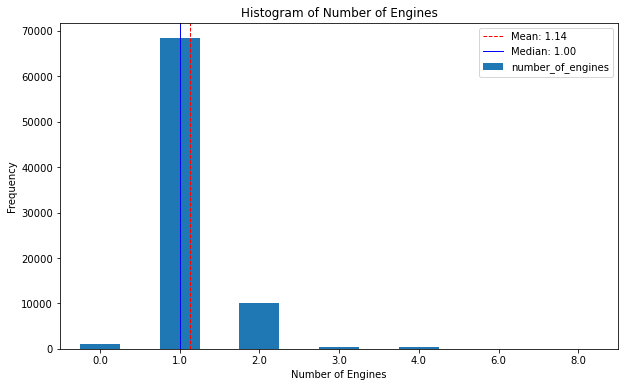

In [47]:
# Get values for histogram
value_counts = df['number_of_engines'].value_counts().sort_index()

# Calculate mean and median
mean_num_engines = df['number_of_engines'].mean()
median_num_engines = df['number_of_engines'].median()

# Plot a histogram of the value counts
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Engines')
plt.xticks(rotation=0)

# Add vertical lines for mean and median
plt.axvline(x=mean_num_engines, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_num_engines:.2f}')
plt.axvline(x=median_num_engines, color='blue', linestyle='-', linewidth=1, label=f'Median: {median_num_engines:.2f}')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Review**

The column is self explanatory and contains missing values. 

**Recommendation**

We could fill the missing values with the median value, however since passing the median will falsely represent the row, we should treat the column as categorical data. 

We should change the column type to object and fill the missing values with an unknown category.

**Action**

In [48]:
# Convert strings representing floating-point numbers to integers
df['number_of_engines'] = df['number_of_engines'].replace({'0.0': 0, '1.0': 1, '2.0': 2, '3.0': 3, '4.0': 4, '6.0': 6, '8.0': 8})

# Replace NaN values with a placeholder string
df['number_of_engines'] = df['number_of_engines'].astype(str).replace('nan', 'NaN')

# Fill missing values with 'unknown'
df['number_of_engines'].fillna('unknown', inplace=True)

### engine_type

In [49]:
# Preview the row entries for the column
column_info(df, 'engine_type')

Preview of the first 5 rows in the column:
0    Reciprocating
1    Reciprocating
2    Reciprocating
3    Reciprocating
4              NaN
Name: engine_type, dtype: object

Value counts of the column:
Reciprocating    68491
Turbo Shaft       3328
Turbo Prop        3206
Turbo Fan         2092
Unknown           1385
Turbo Jet          667
None                19
Electric            10
NONE                 2
LR                   2
Hybrid Rocket        1
UNK                  1
Name: engine_type, dtype: int64

Percentage of missing values in the column:
3.66%


**Review**

The column already has two different types of unknown categories 'NONE' and 'UNK'. 

**Recommendation**

- Rename the 'NONE' and 'UNK' categories to 'unknown'.
- Fill NaNs with the 'unknown' category. 

**Action**

In [50]:
# Replace the 'NONE' category inside of the row to 'Unknown'
df['engine_type'] = df['engine_type'].replace('NONE', 'Unknown')

# Replace the 'UNK' category inside of the row to 'Unknown'
df['engine_type'] = df['engine_type'].replace('UNK', 'Unknown')

# Fill missing values in model with 'unknown'
df['engine_type'].fillna('Unknown', inplace=True)

# Transform the entries in the column to lowercase
df['engine_type'] = df['engine_type'].str.lower()

### far_description

In [51]:
# Preview the row entries for the column
column_info(df, 'far_description')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: far_description, dtype: object

Value counts of the column:
091                               18127
Part 91: General Aviation          6427
137                                1005
135                                 729
121                                 539
Part 137: Agricultural              436
Part 135: Air Taxi & Commuter       288
PUBU                                251
Part 121: Air Carrier               110
133                                 106
129                                  46
Part 133: Rotorcraft Ext. Load       32
Public Use                           16
091K                                 14
Part 129: Foreign                    14
NUSC                                 13
NUSN                                 13
UNK                                  12
Unknown                              10
125                                   4
Part 125: 20+ Pax,6000+ lbs           4
107   

**Review**

The column contains references to the Federal Aviation Regulations (FARs) or similar regulatory categories. The FARs are a set of rules prescribed by the Federal Aviation Administration (FAA) governing all aviation activities in the United States.

The values are not normalized and contain duplicates. 

**Examples**

- Part 91: General Aviation
    - Covers general operating and flight rules for all aircraft not governed by other specific parts (e.g., private pilots, corporate flights, etc.).
    
- PUBU: Public Use
    - Refers to aircraft operated by government agencies or other public entities for official purposes.

- https://www.faa.gov/hazmat/air_carriers/operations

-https://www.ecfr.gov/current/title-14

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

Since we are looking at commercial or private aircrafts the classifications listed while they could apply do not aid in determining risk. 

**Action**

In [52]:
# Drop column
df.drop(columns=['far_description'], inplace=True)

### schedule

In [53]:
# Preview the row entries for the column
column_info(df, 'schedule')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: schedule, dtype: object

Value counts of the column:
UNK     3848
NSCH    3685
SCHD    2753
Name: schedule, dtype: int64

Percentage of missing values in the column:
87.49%


**Review**

Unsure of the value contents of this column.

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

In [54]:
# Drop column
df.drop(columns=['schedule'], inplace=True)

### purpose_of_flight

In [55]:
# Preview the row entries for the column
column_info(df, 'purpose_of_flight')

Preview of the first 5 rows in the column:
0    Personal
1    Personal
2    Personal
3    Personal
4    Personal
Name: purpose_of_flight, dtype: object

Value counts of the column:
Personal                     48527
Instructional                10429
Unknown                       5738
Aerial Application            4627
Business                      3843
Positioning                   1566
Other Work Use                1192
Ferry                          729
Aerial Observation             707
Public Aircraft                685
Executive/corporate            509
Flight Test                    390
Skydiving                      171
External Load                  112
Banner Tow                     101
Public Aircraft - Federal       98
Air Race show                   82
Public Aircraft - Local         74
Public Aircraft - State         63
Air Race/show                   57
Glider Tow                      52
Firefighting                    29
Air Drop                         8
ASHO          

**Review**

The column already contains an unknown category. 

**Recommendation**

The column is valuable to the business goal and as such we will fill in the missing values with unknowns, adding to the already created column. 

**Action**

In [56]:
# Fill NaNs with the 'Unknown' category
df['purpose_of_flight'].fillna('Unknown', inplace=True)

# Transform the entries in the column to lowercase
df['purpose_of_flight'] = df['purpose_of_flight'].str.lower()

### air_carrier

In [57]:
# Preview the row entries for the column
column_info(df, 'air_carrier')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: air_carrier, dtype: object

Value counts of the column:
Pilot                              252
United Airlines                     69
American Airlines                   65
SOUTHWEST AIRLINES CO               42
Delta Air Lines                     40
                                  ... 
PINNACLE AVIATION ACADEMY, INC.      1
White Falcon LLC                     1
SEAY PHILLIP L                       1
Tyler Francis                        1
CAPE MAY COUNTY MOSQUITO             1
Name: air_carrier, Length: 11950, dtype: int64

Percentage of missing values in the column:
82.38%


**Review**

This column is providing insight into both flights performed within the traditional airline schedule and chartered flights. 

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

**Action**

In [58]:
# Drop column
df.drop(columns=['air_carrier'], inplace=True)

### total_fatal_injuries, total_serious_injuries, total_minor_injuries and total_uninjured

In [59]:
# Preview the row entries for the columns listed
columns = [
    'total_fatal_injuries',
    'total_serious_injuries',
    'total_minor_injuries',
    'total_uninjured'
]

for column in columns:
    print('\n', column)
    column_info(df, column)


 total_fatal_injuries
Preview of the first 5 rows in the column:
0    2.0
1    4.0
2    3.0
3    2.0
4    1.0
Name: total_fatal_injuries, dtype: float64

Value counts of the column:
0.0      56555
1.0       7906
2.0       4432
3.0       1280
4.0        854
5.0        224
6.0        134
7.0         45
8.0         33
10.0        20
9.0         15
14.0         7
11.0         6
12.0         5
13.0         3
25.0         3
17.0         3
18.0         3
20.0         2
34.0         2
49.0         2
16.0         2
23.0         2
82.0         2
68.0         1
70.0         1
37.0         1
78.0         1
43.0         1
110.0        1
230.0        1
132.0        1
31.0         1
19.0         1
73.0         1
28.0         1
65.0         1
265.0        1
153.0        1
92.0         1
135.0        1
27.0         1
156.0        1
21.0         1
29.0         1
111.0        1
64.0         1
15.0         1
44.0         1
228.0        1
88.0         1
Name: total_fatal_injuries, dtype: int64

Percentage

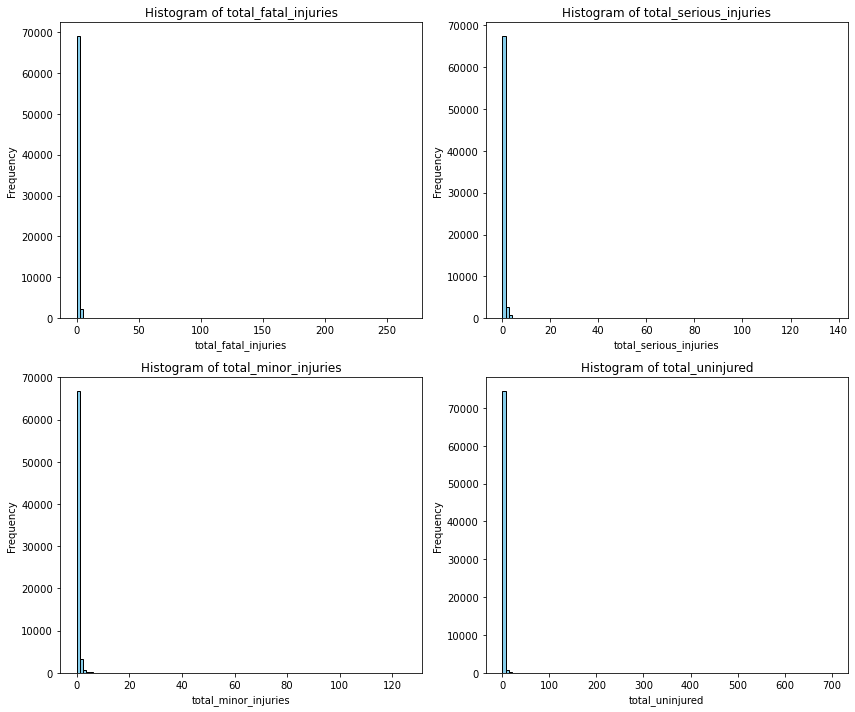

In [60]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, column in enumerate(columns):
    # Drop NaN values before plotting
    data = df[column].dropna()
    
    # Plot histogram
    axes[i].hist(data, bins=100, color='skyblue', edgecolor='black')
    
    # Set title for each subplot
    axes[i].set_title(f'Histogram of {column}')
    
    # Set labels for x and y axes
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**Review**

This columns branches off of the injury_severity column. That column provided both the injury status as well as the count of injured persons (in some cases). 

**Recommendation**

- Create a new column that sums the total amount of injured persons on each flight.
- The distibution of the columns are all right skewed. However similar to the number_of_engines the data being represented is important. 
    - Imputing the median for this column will result in the number of injuries being falsely reported in the dataset. 
    - We should fill each NaN row with 0 if there are missing values.
    
**Action**

In [61]:
# Define columns and replacement values
values = {
    'total_fatal_injuries' : 0,
    'total_serious_injuries' : 0,
    'total_minor_injuries' : 0,
    'total_uninjured' : 0
}

# Fill NaNs with 0's in all columns
df = df.fillna(value=values)

# Create total_injured column
df['total_injuries'] = df[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum(axis=1)

### weather_condition

In [62]:
column_info(df, 'weather_condition')

Preview of the first 5 rows in the column:
0    UNK
1    UNK
2    IMC
3    IMC
4    VMC
Name: weather_condition, dtype: object

Value counts of the column:
VMC    75291
IMC     5616
UNK      546
Unk      121
Name: weather_condition, dtype: int64

Percentage of missing values in the column:
0.78%


**Review**

- VMC 
    - "...is an aviation flight category in which visual flight rules (VFR) flight is permitted—that is, conditions in which pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft. They are the opposite of instrument meteorological conditions (IMC)."
    -https://en.wikipedia.org/wiki/Visual_meteorological_conditions

- IMC
   - "...are weather conditions that require pilots to fly primarily by reference to flight instruments, and therefore under instrument flight rules (IFR), as opposed to flying by outside visual references under visual flight rules (VFR). Typically, this means flying in cloud or poor weather, where little or nothing can be seen or recognised when looking out of the window."
    - https://en.wikipedia.org/wiki/Instrument_meteorological_conditions
    
The column contains duplicate values as UNK and Unk both stand for unknown.

**Recommendation**

- Normalize the casing in the column by making all strings upper case
- Fill NaN's with UNK

**Action**

In [63]:
# Fill NaNs with the 'Unknown' category
df['weather_condition'].fillna('UNK', inplace=True)

# Transform the entries in the column to lowercase
df['weather_condition'] = df['weather_condition'].str.upper()

### broad_phase_of_flight

In [64]:
column_info(df, 'broad_phase_of_flight')

Preview of the first 5 rows in the column:
0      Cruise
1     Unknown
2      Cruise
3      Cruise
4    Approach
Name: broad_phase_of_flight, dtype: object

Value counts of the column:
Landing        15363
Takeoff        12409
Cruise         10069
Maneuvering     8098
Approach        6499
Climb           2005
Taxi            1941
Descent         1861
Go-around       1350
Standing         926
Unknown          500
Other            116
Name: broad_phase_of_flight, dtype: int64

Percentage of missing values in the column:
25.64%


**Review**

This column reports at what stage of the flight did the accident/incident occur. 

There is a large amount of missing values inside of this column as well as both unknown and other categories. 

**Recommendation**
- Collapse the other and unknown row entries. 
- Fill NaN's with unknowns.

**Action**

In [65]:
# Replace the 'Unavaliable' category inside of the row to 'Unknown'
df['broad_phase_of_flight'] = df['broad_phase_of_flight'].replace('Other', 'Unknown')

# Fill NaNs with the 'Unknown' category
df['broad_phase_of_flight'].fillna('Unknown', inplace=True)

# Transform the entries in the column to lowercase
df['broad_phase_of_flight'] = df['broad_phase_of_flight'].str.lower()

### report_status

In [66]:
column_info(df, 'report_status')

Preview of the first 5 rows in the column:
0    Probable Cause
1    Probable Cause
2    Probable Cause
3    Probable Cause
4    Probable Cause
Name: report_status, dtype: object

Value counts of the column:
Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                              61168
Factual                                                                                                                                                                                                                                                                                                                                                                                

In [67]:
# Preview the row entries for the column
# Looking specifically at the Accident column as these are the values of interest
df[df['investigation_type'] == 'Accident'][['investigation_type' , 'report_status']]['report_status'].unique()

array([], dtype=object)

In [68]:
report_status_accident = df[df['investigation_type'] == 'Accident']['report_status']

# Count the occurrences of each word
word_counts = Counter()
for text in report_status_accident:
    if isinstance(text, str): #removes the error caused by floats - NaN's are floats
        words = text.split()
        for word in words:
            if 'pilot' in word or 'instructor' in word:
                word_counts.update([word])
    
# Get the most common words and their frequencies
most_common_words = word_counts.most_common()

most_common_words[:20]

[]

**Review:**

After reviewing the report status for accidents there is a large number of records the mention the pilot as the source of the accident. 

However, the most common entries in the column are:

- Probable Cause : 61754
- Foreign : 1999
- Factual : 167

**Recommendation:**

We make a column identifying explicit pilot error by searching for the keyword of pilot. The keyword while general is reflective of pilot error given that each row represents an accident and that when a description is given, it is telling us about the error that occurred that caused the accident. 

The new column will be a boolean value. 

Fill the NaN values with 'unknown'

**Examples:**

- "The pilot’s decision to perform a takeoff from a perpendicular taxiway rather than the airport runway, which led to the airplane striking trees at the end of the departure path."

- "The pilot’s failure to maintain airplane control during the landing roll on a snow-covered runway surface."

- "The pilot’s failure to retract the flaps during a go-around from a bounced landing, which resulted in a collision with trees then terrain."

**Action**

In [69]:
# Create a new column 'human_error' with binary labels based on 'investigation_type'
df['human_error'] = df['investigation_type'].str.contains('pilot', case=False) | df['investigation_type'].str.contains('instructor', case=False)

# Convert boolean values to integers (True -> 1, False -> 0)
df['human_error'] = df['human_error'].astype(int)

# Fill NaNs with the 'Unknown' category
df['report_status'].fillna('Unknown', inplace=True)

### publication_date

In [70]:
column_info(df, 'publication_date')

Preview of the first 5 rows in the column:
0           NaN
1    19-09-1996
2    26-02-2007
3    12-09-2000
4    16-04-1980
Name: publication_date, dtype: object

Value counts of the column:
25-09-2020    15406
26-09-2020     1290
31-03-1993      446
25-11-2003      395
15-02-2001      374
              ...  
13-01-2022        1
04-12-2002        1
30-04-1996        1
27-10-1992        1
02-03-2016        1
Name: publication_date, Length: 2035, dtype: int64

Percentage of missing values in the column:
15.42%


**Review**

Given that we have the event_date column (with no missing values), the publication date is not as important of a column. 

**Recommendation**

Since we are only using the report_status column to create a new boolean column, we do not need the information listed in this column and can drop it from the datset. 

The information provided in the column is not pertinent to the business goal and there are missing values.

In [71]:
# Drop column
df.drop(columns=['publication_date'], inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82216 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      82216 non-null  object        
 1   event_date              82216 non-null  datetime64[ns]
 2   country                 82216 non-null  object        
 3   injury_severity         82216 non-null  object        
 4   aircraft_damage         82216 non-null  object        
 5   aircraft_category       82216 non-null  object        
 6   make                    82216 non-null  object        
 7   model                   82216 non-null  object        
 8   amateur_built           82216 non-null  object        
 9   number_of_engines       82216 non-null  object        
 10  engine_type             82216 non-null  object        
 11  purpose_of_flight       82216 non-null  object        
 12  total_fatal_injuries    82216 non-null  float6

In [73]:
df.shape

(82216, 22)

Look into make to see if we can determine aircraft type based on division of corp who made it. 

In [96]:
# Filter based on amateur_make
filtered_df = df[df['amateur_built'].isin(['no', 'unknown'])]

# Count unique occurrences of each make
make_counts = filtered_df['make'].value_counts()

# Sort the makes by count in ascending order
make_counts_sorted = make_counts.sort_values()

# Group makes by name
grouped_makes = {}

for make in make_counts_sorted.index:
    origin_make = make.split()[0]  # Get the origin make ('cessna' from 'cessna llc')

    if origin_make not in grouped_makes:
        grouped_makes[origin_make] = {}

    grouped_makes[origin_make][make] = make_counts_sorted[make]

for origin_make, makes in sorted(grouped_makes.items()):
    print(f"{origin_make}:")
    for make, count in makes.items():
        print(f"  {make} : {count}")

1200:
  1200 : 1
177mf:
  177mf llc : 1
2000:
  2000 mccoy : 1
2021fx3:
  2021fx3 llc : 1
a.:
  a. schleicher gmbh & co. : 1
aaa:
  aaa aircraft llc : 1
  aaa aircraft leasing : 1
ab:
  ab sportine aviacija : 6
ac:
  ac mfg & dev't co : 1
adams:
  adams balloons llc : 1
  adams balloon : 1
  adams dennis allen : 1
  adams : 16
advanced:
  advanced technology : 1
  advanced aviation : 1
  advanced acft : 1
adventura:
  adventura : 1
aerial:
  aerial productions intl. inc. : 1
aermacchi:
  aermacchi : 2
aero:
  aero mercantil s.a. : 1
  aero vodochody aero works : 1
  aero at sp zoo : 1
  aero tek inc. : 1
  aero sp z o o (gobosh) : 1
  aero works : 1
  aero design eleven : 1
  aero bristell : 1
  aero falcon intl., inc. : 1
  aero adventure : 2
  aero sp z o o : 4
  aero vodochody aero. works : 10
  aero vodochody : 18
  aero commander : 395
aerodyne:
  aerodyne : 1
aerofab:
  aerofab inc : 1
  aerofab : 1
  aerofab inc. : 13
aerofab,:
  aerofab, inc. : 1
aerolite:
  aerolite : 1
aeromo

  unknown : 2
unregistered:
  unregistered : 1
urban:
  urban air : 1
  urban air sro : 2
us:
  us light aircraft corp : 1
us/lta:
  us/lta : 2
utva:
  utva : 1
valentin:
  valentin : 4
valldejuli:
  valldejuli john a : 1
van:
  van lehn richard glenn : 1
van's:
  van's aircraft, inc. : 1
vans:
  vans aircraft, inc. : 1
  vans : 8
  vans aircraft inc : 10
varga:
  varga aircraft corp. : 2
  varga : 23
vashon:
  vashon aircraft : 2
vaughn:
  vaughn : 1
velocity:
  velocity : 1
vickers:
  vickers slingsby : 1
  vickers : 6
vickers-slingsby:
  vickers-slingsby : 1
vining:
  vining john k : 1
volaircraft:
  volaircraft : 1
vought:
  vought : 1
vulcanair:
  vulcanair : 1
vultee:
  vultee : 3
waco:
  waco classic aircraft corp. : 2
  waco classic aircraft corp : 4
  waco classic aircraft : 8
  waco : 140
walker:
  walker : 1
walter:
  walter s johnson iii : 1
  walter tachiki : 1
ware:
  ware jerry l : 1
waspair:
  waspair : 2
wayne:
  wayne ison : 1
wdl:
  wdl : 1
weatherly:
  weatherly avi